In [624]:
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns
import matplotlib as mpl


In [625]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [626]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [627]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


### Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.


In [628]:
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

In [629]:
df.shape
df["country"].value_counts()

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

In [630]:
countries = pd.DataFrame(df["country"].value_counts())
countries.rename(columns = {'country':'count'}, inplace = True)
print(countries)

                        count
Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7


/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_52983/3078320039.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries.index, rotation = 90)


Text(0.5, 1.0, 'Visited frequency of countries\n')

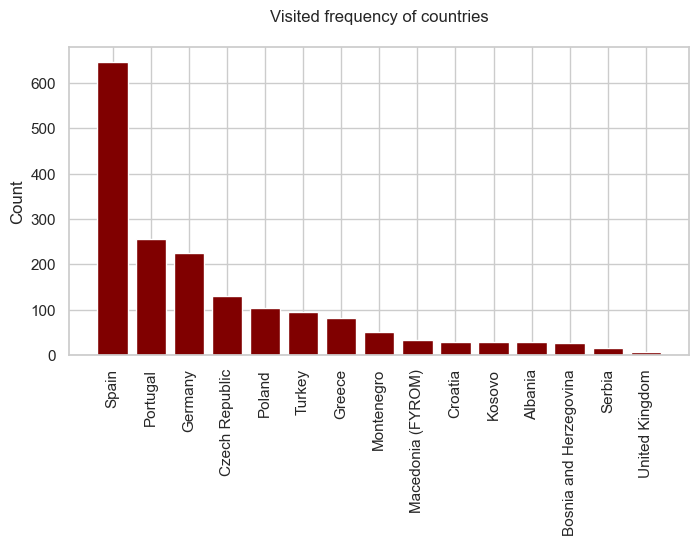

In [631]:
# matplotlib
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(countries.index,countries['count'],color = 'maroon')
ax.set_xticklabels(countries.index, rotation = 90)
ax.set_ylabel("Count")
ax.set_title('Visited frequency of countries\n')

Text(0.5, 1.0, 'Visited frequency of countries\n')

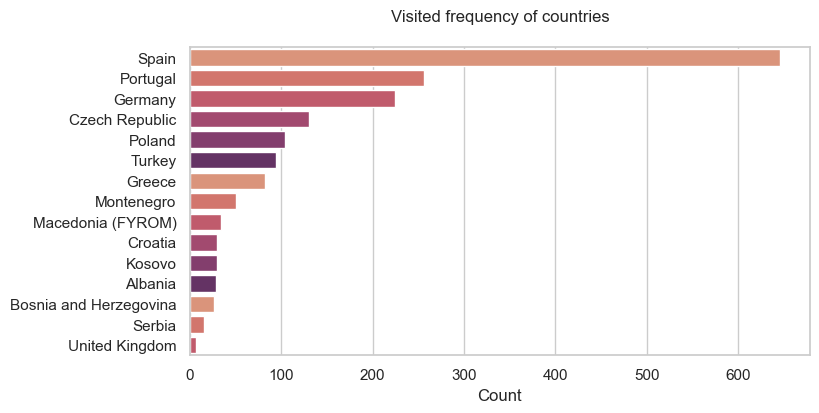

In [632]:
# Seaborn
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('ticks')
ax = sns.barplot(x='count', y = countries.index, data = countries,palette=sns.color_palette("flare"))
ax.set_xlabel("Count")
ax.set_title('Visited frequency of countries\n')

/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_52983/287148555.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries.index, rotation = 90)


Text(0.5, 1.0, 'Visited frequency of countries\n')

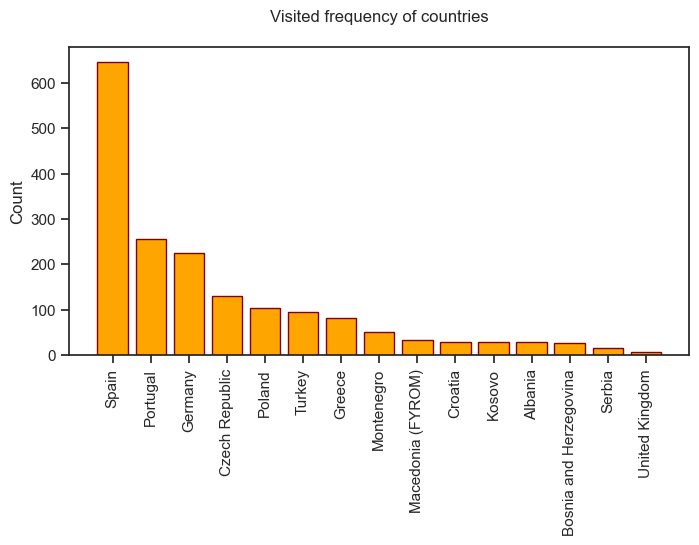

In [633]:
# re-create the plot above, but make the bars orange with maroon edges.
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(countries.index,countries['count'],color = 'orange',edgecolor = 'maroon')
ax.set_xticklabels(countries.index, rotation = 90)
ax.set_ylabel("Count")
ax.set_title('Visited frequency of countries\n')

### Q2: Draw the same bar chart, but now for the most visited cities instead of countries

In [634]:
#cities appeared more than 10 times
cities = pd.DataFrame(df["city"].value_counts())
cities.rename(columns = {'city':'count'}, inplace = True)
cities = cities[cities['count']>9]
print(cities)

                    count
Barcelona             632
Lisbon                158
Tübingen              131
Prague                 97
Istanbul               94
Athens                 67
Krakow                 58
Porto                  58
Freiburg               54
Kotor                  51
Ohrid                  34
Prizren                30
Berat                  27
Kraków-Śródmieście     26
Split                  23
Sarajevo               15
Belgrade               14
Kutna Hora             12
Sintra                 12


Text(0.5, 1.0, 'Visited frequency of cities\n')

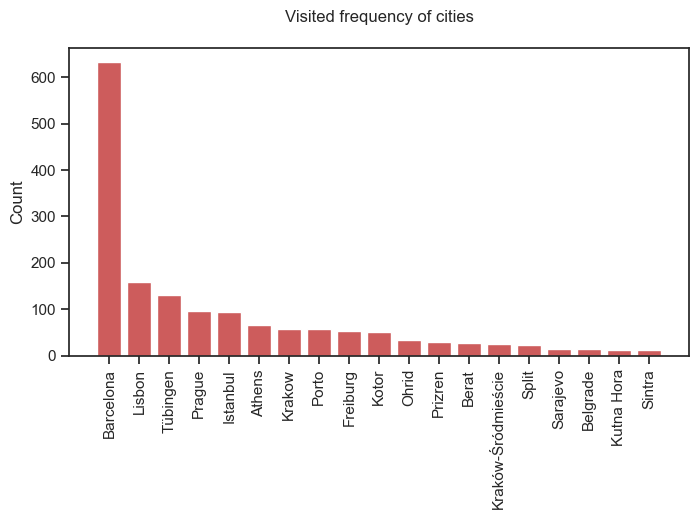

In [635]:
# matplotlib
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(cities.index,cities['count'],color = 'indianred')
plt.xticks(rotation=90)
ax.set_ylabel("Count")
ax.set_title('Visited frequency of cities\n')

Text(0.5, 1.0, 'Visited frequency of cities\n')

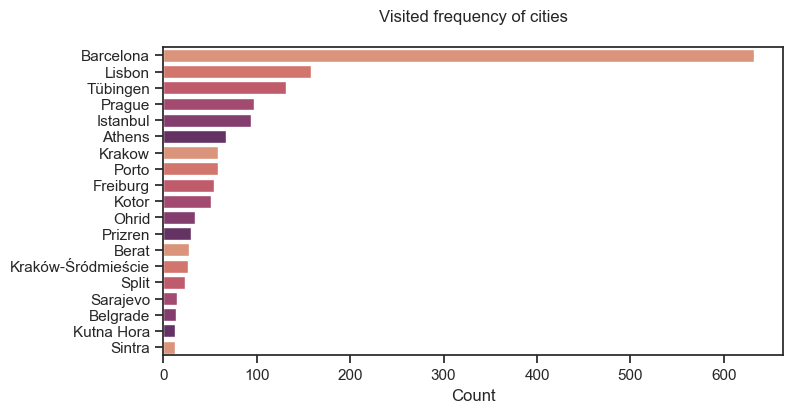

In [636]:
# Seaborn
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('ticks')
ax = sns.barplot(x='count', y = cities.index, data = cities,palette=sns.color_palette("flare"))
ax.set_xlabel("Count")
ax.set_title('Visited frequency of cities\n')

### Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 

In [637]:
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

[(35.0, 60.0)]

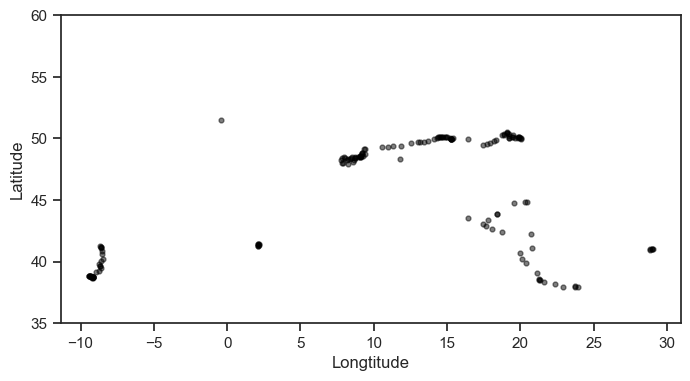

In [638]:
# matploylib
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(rs['lon'],rs['lat'],color = 'black',s = 12, alpha = 0.5)
ax.set_xlabel('Longtitude')
ax.set_ylabel("Latitude")
ax.set(ylim=(35, 60))

[(35.0, 60.0)]

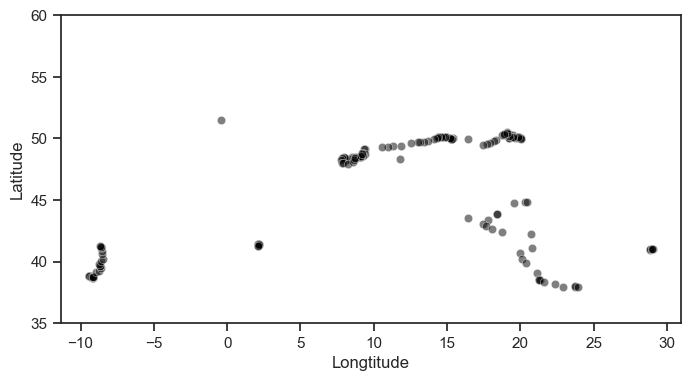

In [639]:
# Seaborn
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')

sns.scatterplot(x="lon", y="lat",
                data=rs,color = 'black', alpha = 0.5)

ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")
ax.set(ylim=(35, 60))

#### Q4: Draw a  matplotlib and seaborn line chart from countdata. 

In [588]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()

In [589]:
#  Please style the chart to make it look nicer with good size and alpha settings. 
datecount = pd.DataFrame(countdata, columns = ['count'])

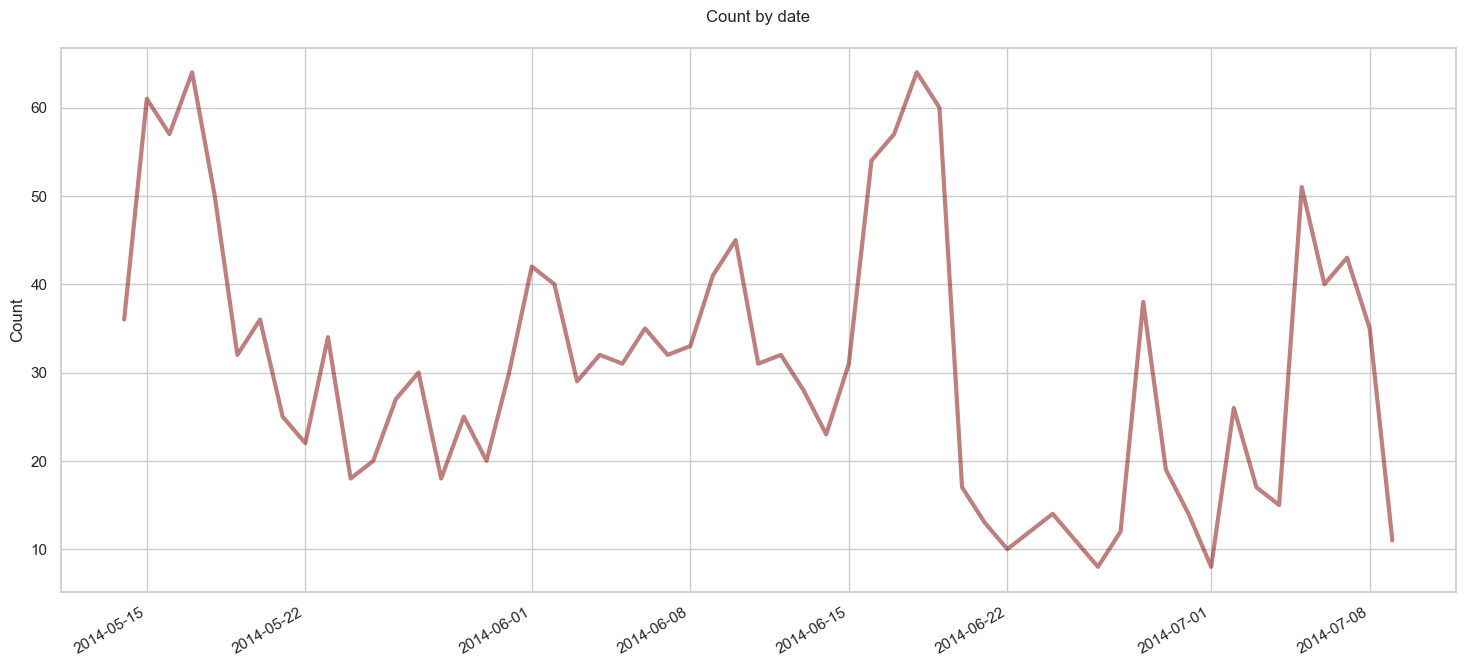

In [590]:
# matploylib
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(datecount.index, datecount['count'],color = 'maroon',linewidth = 3, alpha = 0.5)
ax.set_title('Count by date\n')
ax.set_ylabel("Count")
plt.gcf().autofmt_xdate()

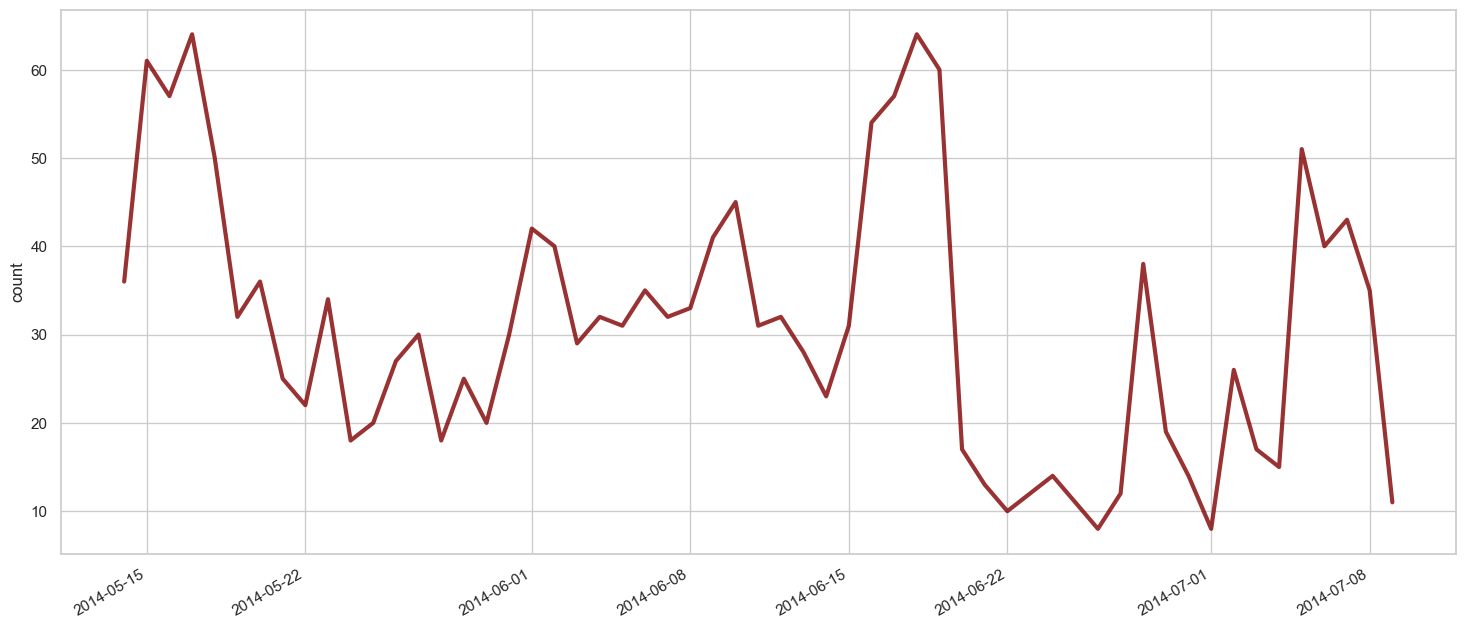

In [591]:
# Seaborn
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=datecount, x=datecount.index, y="count",color = 'maroon',linewidth = 3, alpha = 0.8)
plt.gcf().autofmt_xdate()

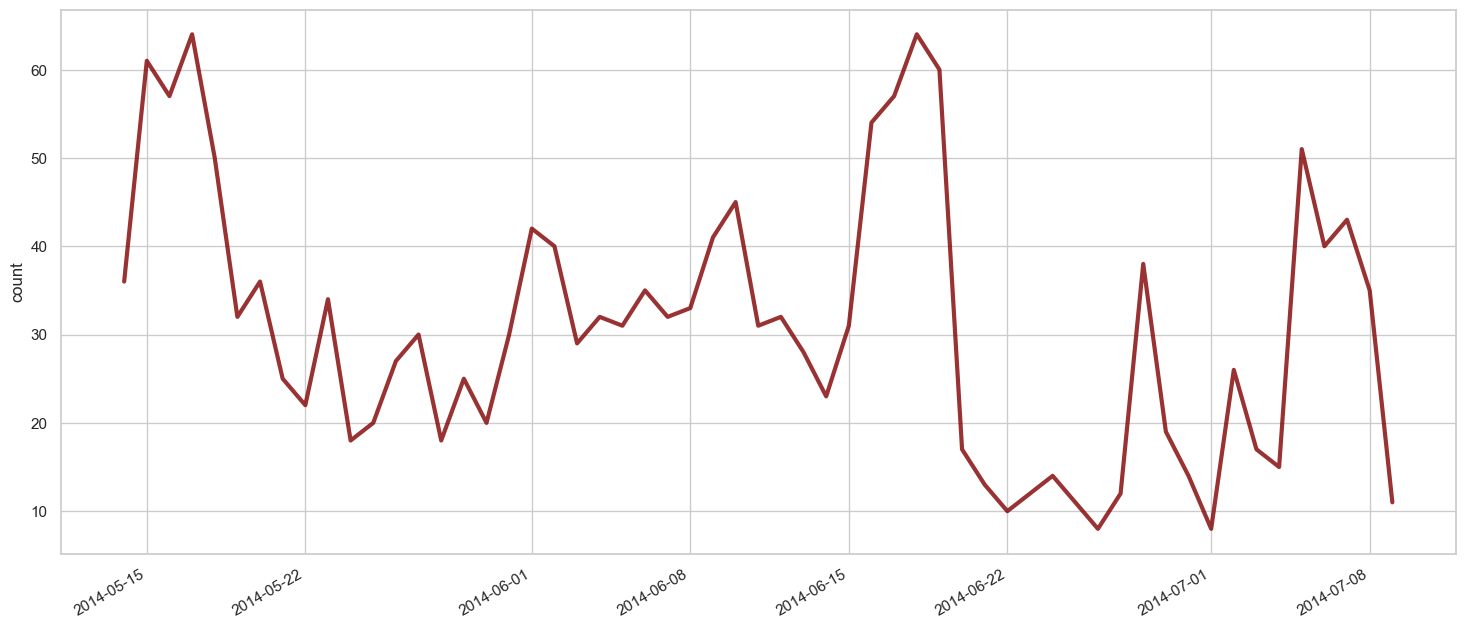

In [592]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(data=datecount, x=datecount.index, y="count",color = 'maroon',linewidth = 3, alpha = 0.8)
plt.gcf().autofmt_xdate()

### Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 

Text(0, 0.5, 'Count')

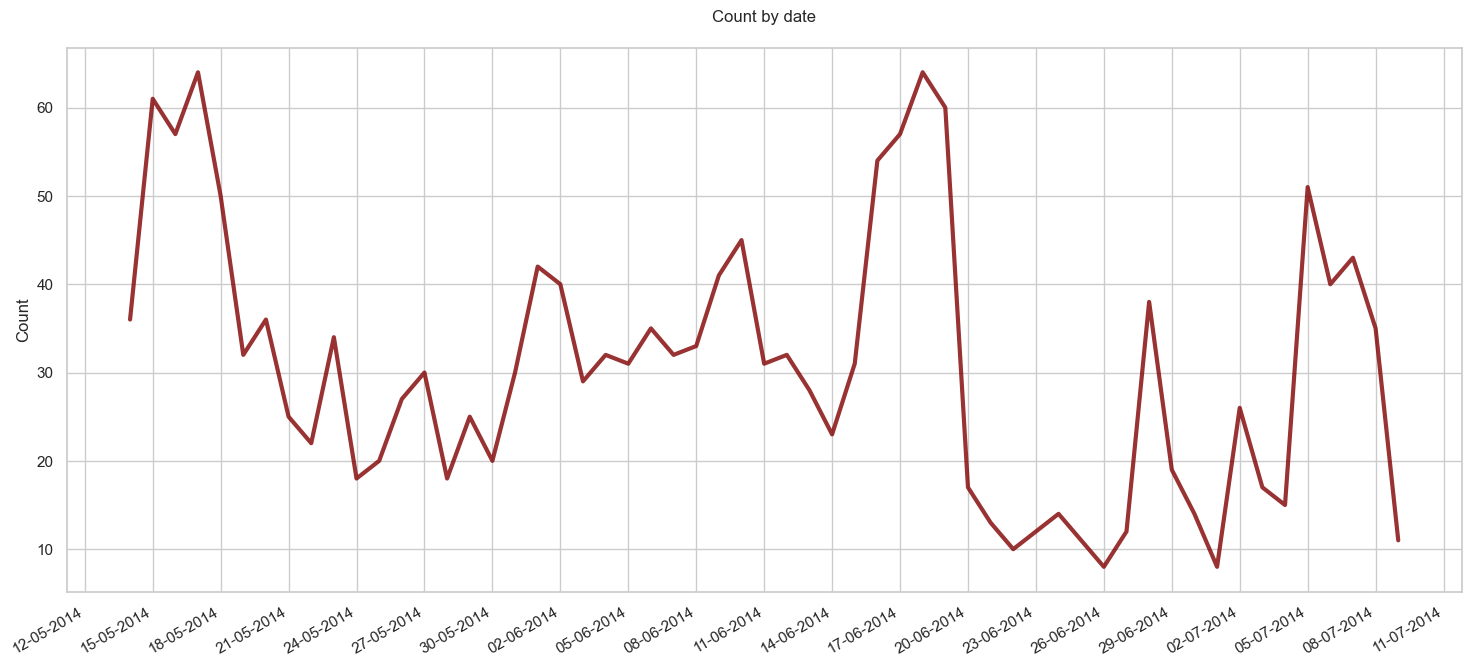

In [593]:
# matploylib
# Make the vertical tick marks 3 days apart 
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(datecount.index, datecount['count'],color = 'maroon',linewidth = 3, alpha = 0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_title('Count by date\n')
ax.set_ylabel("Count")


In [594]:
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib
# https://stackoverflow.com/questions/40559971/python-matplotlib-smooth-plot-line-for-x-axis-with-date-values

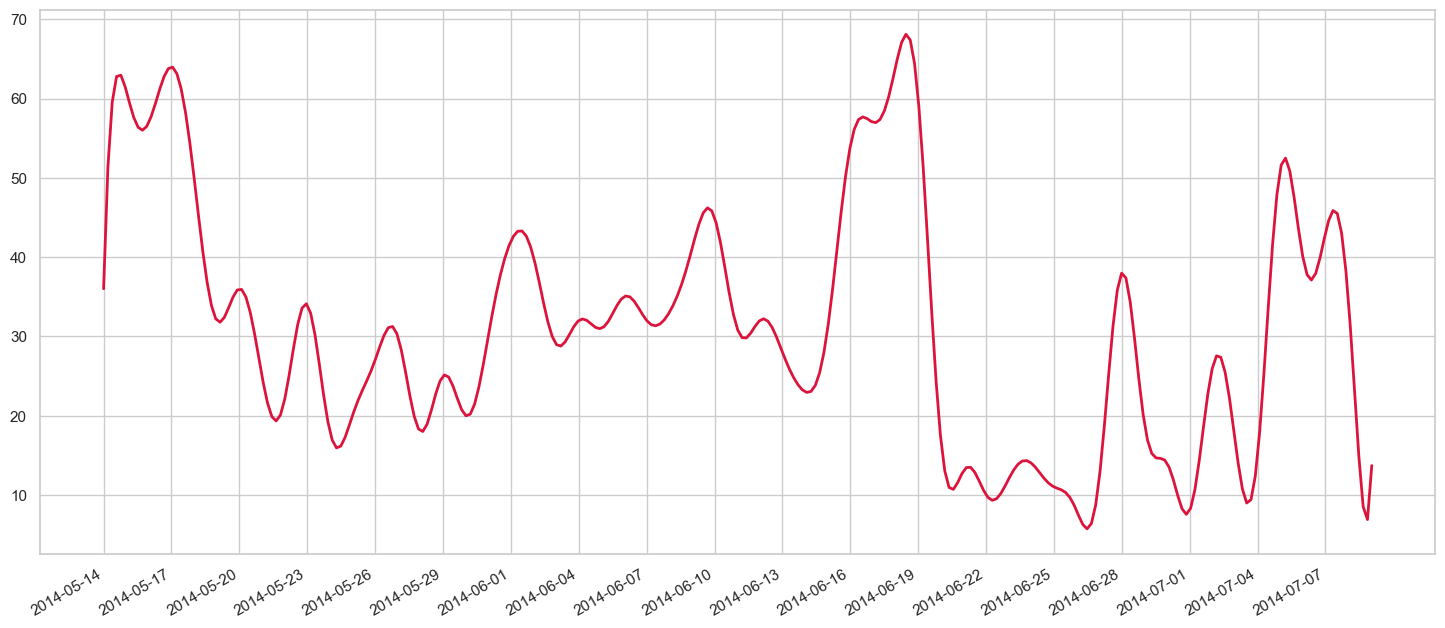

In [595]:
from scipy.interpolate import make_interp_spline

fig, axs = plt.subplots(figsize=(18,8))
x = datecount.index
y = datecount.values

# workaround by creating linespace for length of your x axis
x_new = np.linspace(0, len(datecount.index), 300)
a_BSpline = make_interp_spline(
    [i for i in range(0, len(datecount.index))],
    datecount.values,
    k=5,
)
y_new = a_BSpline(x_new)

# plot this new plot with linestyle = "-"
axs.plot(
    x_new[:-5], # removing last 5 entries to remove noise, because interpolation outputs large values at the end.
    y_new[:-5],
    "-", color = 'crimson', linewidth = 2)

# to get the date on x axis we will keep our previous plot but linestyle will be None so it won't be visible
x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="initial")
xt = [x[i] for i in range(0,len(x),3)] #另一种3天记一次xlabel的方法
plt.xticks(xt)
plt.gcf().autofmt_xdate() # Rotation
plt.show()

### Q6: draw a pie chart for cities.

In [596]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [597]:
cities_df = pd.DataFrame(df['city'].value_counts())

cities_df.rename(columns = {'city':'count'}, inplace = True)
cities_df

,count
Barcelona,632
Lisbon,158
Tübingen,131
Prague,97
Istanbul,94
...,...
Ostrava,1
Novy Bohumin,1
Bytom,1
Ruda Slaska,1


In [598]:
# Please style the chart to make it look nicer. 

In [599]:
other = cities_df[cities_df['count'] <= 30].sum()
type(other)


pandas.core.series.Series

In [600]:
cities_df_other = cities_df[cities_df['count'] >= 30]
cities_df_other.loc['Other'] = other[0]
cities_df_other

/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_52983/1757332968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df_other.loc['Other'] = other[0]


,count
Barcelona,632
Lisbon,158
Tübingen,131
Prague,97
Istanbul,94
Athens,67
Krakow,58
Porto,58
Freiburg,54
Kotor,51


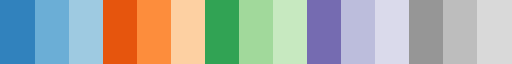

In [601]:
cmap = mpl.cm.get_cmap("tab20c", 15)
color = cmap(np.linspace(0, 1, 15))
cmap

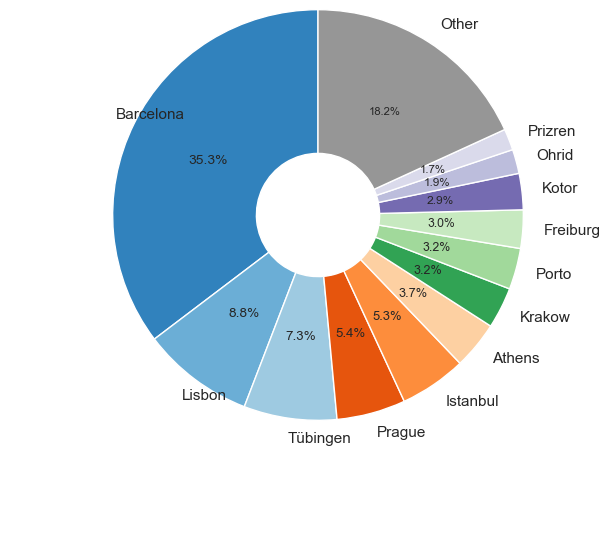

In [602]:
fig, ax = plt.subplots(figsize=(8, 4))
wedges,cityname, p_text=ax.pie(cities_df_other['count'], labels=cities_df_other.index, radius=10, center=(15, 15),wedgeprops=dict(width=7), startangle=90,autopct='%1.1f%%',colors = color)
size = 10
for t in p_text:
    t.set_size(size)
    size -= 2/len(cities_df_other[cities_df_other['count'] >= 10])

ax.set(xlim=(0, 15),ylim=(0, 15))

plt.show()

#Don't know why the label of 'Barcelona' and 'Lisbon' overlap the plot.

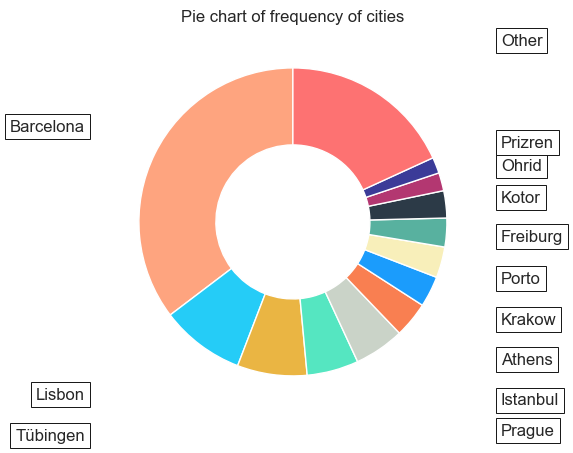

In [423]:
# #another pie chart
# fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))
# color = ['#FEA47F','#25CCF7','#EAB543','#55E6C1','#CAD3C8','#F97F51','#1B9CFC','#F8EFBA','#58B19F','#2C3A47','#B33771','#3B3B98','#FD7272','#9AECDB','#D6A2E8']

# wedges, texts = ax.pie(cities_df_other['count'],colors = color, wedgeprops=dict(width=0.5), startangle=90)

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = f"angle,angleA=0,angleB={ang}"
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(cities_df_other.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Pie chart of frequency of cities")

# plt.show()